<a href="https://colab.research.google.com/github/sarahmaddy/cse_430_ML1/blob/main/lab8_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report


In [3]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Cars-RF.csv")

In [4]:
data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
data.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [6]:
data.value_counts()

vhigh  vhigh.1  2      2.1   small  low   unacc
high   high     2      2     big    high  unacc    1
med    med      4      more  small  med   acc      1
                                    high  acc      1
                             med    med   acc      1
                                    low   unacc    1
                                                  ..
low    low      3      2     med    med   unacc    1
                                    low   unacc    1
                                    high  unacc    1
                             big    med   unacc    1
vhigh  vhigh    5more  more  small  med   unacc    1
Length: 1727, dtype: int64

In [7]:

data.rename(columns={'vhigh':'buying','2':'doors','2.1':'persons','small':'lug_boot','low':'safety','unacc':'class'},inplace=True)

In [9]:
data.rename(columns={'vhigh.1':'maintanence'},inplace=True)

In [10]:
data.columns

Index(['buying', 'maintanence', 'doors', 'persons', 'lug_boot', 'safety',
       'class'],
      dtype='object')

In [13]:
data.isnull().sum()

buying         0
maintanence    0
doors          0
persons        0
lug_boot       0
safety         0
class          0
dtype: int64

 ordinal encoding and label encoding are not exactly the same. While both are techniques used to transform categorical variables into numerical values, they differ in their assumption about the relative ordering of categories.

Label encoding assigns a unique integer value to each category of the variable, without any consideration of the inherent ordering. The ordering of the values is arbitrary and does not convey any meaningful information about the categories.

In [16]:
from sklearn.preprocessing import OrdinalEncoder
ord_encoder = OrdinalEncoder()
data= ord_encoder.fit_transform(data)

In [19]:
data=pd.DataFrame(data)


In [21]:
data.columns

RangeIndex(start=0, stop=7, step=1)

In [20]:
data.value_counts()

0    1    2    3    4    5    6  
0.0  0.0  0.0  0.0  0.0  0.0  2.0    1
2.0  2.0  2.0  2.0  2.0  2.0  0.0    1
                         0.0  0.0    1
                    1.0  2.0  0.0    1
                         1.0  2.0    1
                                    ..
1.0  1.0  1.0  0.0  1.0  2.0  2.0    1
                         1.0  2.0    1
                         0.0  2.0    1
                    0.0  2.0  2.0    1
3.0  3.0  3.0  2.0  2.0  2.0  2.0    1
Length: 1727, dtype: int64

In [22]:
data.rename(columns={0:'buying',1:'maintanence',2:'doors',3:'persons',4:'lug_boot',5:'safety',6:'class'},inplace=True)

In [23]:
data.columns

Index(['buying', 'maintanence', 'doors', 'persons', 'lug_boot', 'safety',
       'class'],
      dtype='object')

In [24]:
data.value_counts()

buying  maintanence  doors  persons  lug_boot  safety  class
0.0     0.0          0.0    0.0      0.0       0.0     2.0      1
2.0     2.0          2.0    2.0      2.0       2.0     0.0      1
                                               0.0     0.0      1
                                     1.0       2.0     0.0      1
                                               1.0     2.0      1
                                                               ..
1.0     1.0          1.0    0.0      1.0       2.0     2.0      1
                                               1.0     2.0      1
                                               0.0     2.0      1
                                     0.0       2.0     2.0      1
3.0     3.0          3.0    2.0      2.0       2.0     2.0      1
Length: 1727, dtype: int64

In [25]:
X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Data Types of Variables:")
print(X_train.dtypes)


Shape of X_train: (1381, 6)
Shape of X_test: (346, 6)
Data Types of Variables:
buying         float64
maintanence    float64
doors          float64
persons        float64
lug_boot       float64
safety         float64
dtype: object


In [28]:
rf_default = RandomForestClassifier(random_state=42)
rf_default.fit(X_train, y_train)
print("\nRandom Forest Classifier Model with Default Parameters:")
print("Training Accuracy:", rf_default.score(X_train, y_train))
print("Testing Accuracy:", rf_default.score(X_test, y_test))


Random Forest Classifier Model with Default Parameters:
Training Accuracy: 1.0
Testing Accuracy: 0.9624277456647399


In [30]:
feature_importances = pd.DataFrame(rf_default.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print("\nFeature Importance Scores:")
print(feature_importances)


Feature Importance Scores:
             importance
safety         0.280329
persons        0.228555
buying         0.197642
maintanence    0.153121
lug_boot       0.079368
doors          0.060984


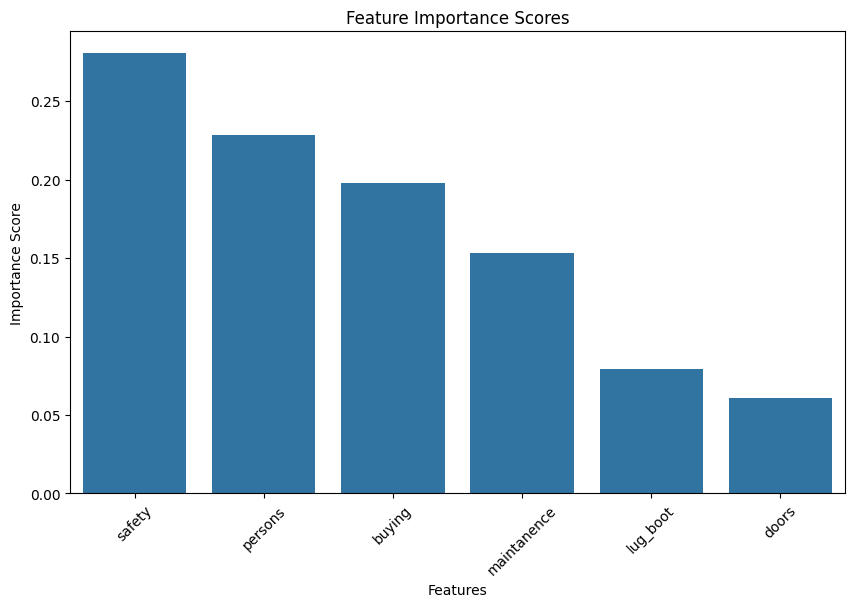

In [32]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.index, y=feature_importances['importance'])
plt.title('Feature Importance Scores')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45)
plt.show()

In [34]:
selected_features = feature_importances[feature_importances['importance'] > 0.05].index
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

rf_selected = RandomForestClassifier(random_state=42)
rf_selected.fit(X_train_selected, y_train)

RandomForestClassifier(random_state=42)

In [35]:
y_pred = rf_selected.predict(X_test_selected)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[ 72   1   3   1]
 [  2  10   0   3]
 [  1   0 236   0]
 [  1   0   0  16]]


In [36]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94        77
         1.0       0.91      0.67      0.77        15
         2.0       0.99      1.00      0.99       237
         3.0       0.80      0.94      0.86        17

    accuracy                           0.97       346
   macro avg       0.91      0.88      0.89       346
weighted avg       0.97      0.97      0.96       346

